In [1]:
pdf_path  = "Constitution.pdf"

In [2]:
# Requires !pip install PyMuPDF, see: https://github.com/pymupdf/pymupdf
import fitz # (pymupdf, found this is better than pypdf for our use case, note: licence is AGPL-3.0, keep that in mind if you want to use any code commercially)
from tqdm.auto import tqdm # for progress bars, requires !pip install tqdm 
import re

def text_formatter(text: str) -> str:
    """Performs minor formatting on text."""
    cleaned_text = text.replace("\n", " ").strip() # note: this might be different for each doc (best to experiment)
    # cleaned_text = re.sub(r'\d+', '', text)
    # Other potential text formatting functions can go here
    return cleaned_text

# Open PDF and get lines/pages
# Note: this only focuses on text, rather than images/figures etc
def open_and_read_pdf(pdf_path: str) -> list[dict]:
    """
    Opens a PDF file, reads its text content page by page, and collects statistics.

    Parameters:
        pdf_path (str): The file path to the PDF document to be opened and read.

    Returns:
        list[dict]: A list of dictionaries, each containing the page number
        (adjusted), character count, word count, sentence count, token count, and the extracted text
        for each page.
    """
    doc = fitz.open(pdf_path)  # open a document
    
    print("doc is " , doc)
    print("doc is " , dict(enumerate(doc)))
    
    pages_and_texts = [] # an array which will have dict in it.....or a array of objects 
    # or we can say a list containing dicts.....since return type is list[dict]
    
    for page_number, page in tqdm(enumerate(doc)):  # iterate the document pages
        text = page.get_text()  # get plain text encoded as UTF-8
        text = text_formatter(text)
        pages_and_texts.append({"page_number": page_number - 33,  # adjust page numbers since our PDF starts on page 42
                                "page_char_count": len(text),
                                "page_word_count": len(text.split(" ")),
                                "page_sentence_count_raw": len(text.split(". ")),
                                "page_token_count": len(text) / 4,  # 1 token = ~4 chars
                                "text": text})
    return pages_and_texts

pages_and_texts = open_and_read_pdf(pdf_path=pdf_path)
pages_and_texts[40:41]

# pages_and_texts returns
# [
#     {
#         "page_number": 1,
#         "page_char_count": 1500,
#         "page_word_count": 250,
#         "text": "Once upon a time..."
#     },
#     {
#         "page_number": 2,
#         "page_char_count": 1700,
#         "page_word_count": 300,
#         "text": "The journey continued..."
#     }
# ]



c:\Users\Bhavesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


doc is  Document('Constitution.pdf')
doc is  {0: page 0 of Constitution.pdf, 1: page 1 of Constitution.pdf, 2: page 2 of Constitution.pdf, 3: page 3 of Constitution.pdf, 4: page 4 of Constitution.pdf, 5: page 5 of Constitution.pdf, 6: page 6 of Constitution.pdf, 7: page 7 of Constitution.pdf, 8: page 8 of Constitution.pdf, 9: page 9 of Constitution.pdf, 10: page 10 of Constitution.pdf, 11: page 11 of Constitution.pdf, 12: page 12 of Constitution.pdf, 13: page 13 of Constitution.pdf, 14: page 14 of Constitution.pdf, 15: page 15 of Constitution.pdf, 16: page 16 of Constitution.pdf, 17: page 17 of Constitution.pdf, 18: page 18 of Constitution.pdf, 19: page 19 of Constitution.pdf, 20: page 20 of Constitution.pdf, 21: page 21 of Constitution.pdf, 22: page 22 of Constitution.pdf, 23: page 23 of Constitution.pdf, 24: page 24 of Constitution.pdf, 25: page 25 of Constitution.pdf, 26: page 26 of Constitution.pdf, 27: page 27 of Constitution.pdf, 28: page 28 of Constitution.pdf, 29: page 29 of Co

402it [00:00, 532.48it/s]


[{'page_number': 7,
  'page_char_count': 2416,
  'page_word_count': 485,
  'page_sentence_count_raw': 28,
  'page_token_count': 604.0,
  'text': 'THE CONSTITUTION OF  INDIA (Part III.—Fundamental Rights) 10 (e) to reside and settle in any part of the territory of India; 1[and] 2[(f)*                      *                      *                    *                     *]  (g) to practise any profession, or to carry on any occupation, trade or  business.  3[(2) Nothing in sub-clause (a) of clause (1) shall affect the operation of  any existing law, or prevent the State from making any law, in so far as such  law imposes reasonable restrictions on the exercise of the right conferred by the  said sub-clause in the interests of 4[the sovereignty and integrity of India], the  security of the State, friendly relations with foreign States, public order,  decency or morality, or in relation to contempt of court, defamation or  incitement to an offence.] (3) Nothing in sub-clause (b) of the sa

In [3]:
import random 

random.sample(pages_and_texts,k=3)

[{'page_number': 91,
  'page_char_count': 2420,
  'page_word_count': 455,
  'page_sentence_count_raw': 5,
  'page_token_count': 605.0,
  'text': 'THE CONSTITUTION OF  INDIA (Part VI.—The States)  94 (b) if any money has been spent on any service during a financial  year in excess of the amount granted for that service and for that year, cause to be laid before the House or the Houses of the Legislature of the State  another statement showing the estimated amount of that expenditure or cause to  be presented to the Legislative Assembly of the State a demand for such excess,  as the case may be. (2) The provisions of articles 202, 203 and 204 shall have effect in  relation to any such statement and expenditure or demand and also to any law  to be made authorising the appropriation of moneys out of the Consolidated  Fund of the State to meet such expenditure or the grant in respect of such  demand as they have effect in relation to the annual financial statement and the  expenditure menti

In [4]:
# !pip install spacy
from spacy.lang.en import English

nlp = English()

# add a sentencier pipeline .

nlp.add_pipe("sentencizer")

#create doc instance as an example

doc = nlp("this is a sentence . This another sentence. I like elephant.")

assert len(list(doc.sents)) == 3

list(doc.sents)

[this is a sentence ., This another sentence., I like elephant.]

In [5]:
for item in tqdm(pages_and_texts):
    item["sentences"] = list(nlp(item["text"]).sents)
    
    # nlp(item["text"]) → This processes the text using spaCy’s NLP pipeline.
    # .sents → Extracts the sentences from the processed text.
    # list() → Converts the sentences into a standard Python list for easier manipulation.
    # 🧠 Note: The extracted sentences are not regular Python strings yet; they are Span objects (spaCy's datatype).
    
    item["sentences"] = [str(sentence) for sentence in item["sentences"]]
    item["page_sentence_count_spacy"] = len(item["sentences"])
    
    # This converts each Span object into a string for compatibility and easier text manipulation.


  0%|          | 0/402 [00:00<?, ?it/s]

100%|██████████| 402/402 [00:02<00:00, 200.54it/s]


In [6]:
import pandas as pd
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy
count,402.00,402.00,402.00,402.00,402.00,402.00
mean,167.50,2160.87,383.43,20.66,540.22,19.11
std,116.19,523.58,99.42,13.32,130.90,12.24
min,-33.00,187.00,32.00,1.00,46.75,1.00
25%,67.25,1885.75,325.00,9.00,471.44,9.00
50%,167.50,2257.00,397.50,18.00,564.25,17.00
75%,267.75,2523.00,454.75,30.00,630.75,28.00
max,368.00,3764.00,659.00,93.00,941.00,76.00


In [7]:
#Define split sixw to turn groups of sentences into chunks.
num_sentence_chunk_size = 10

#create a function to split lists of texts recursively into chink size

#EG [20] -> [10 ,10 ] OR [25] -> [10,10,5]

def split_list(input_list : list[str],
               slice_size : int = num_sentence_chunk_size ) -> list[list[str]]:
    return [input_list[i: i + slice_size] for i in range(0,len(input_list), slice_size)]

test_list = list(range(25))
split_list(test_list)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24]]

In [8]:
#loop thorugh pages and texts and split sentences into chunks 

for item in tqdm(pages_and_texts):
    item["sentence_chunks"] = split_list(input_list=item["sentences"],
                                        slice_size=num_sentence_chunk_size)
    
    item["num_chunks"] = len(item["sentence_chunks"])

100%|██████████| 402/402 [00:00<00:00, 69125.54it/s]


In [9]:
random.sample(pages_and_texts , k=1)

[{'page_number': 342,
  'page_char_count': 2206,
  'page_word_count': 381,
  'page_sentence_count_raw': 17,
  'page_token_count': 551.5,
  'text': '345 1[TENTH SCHEDULE [Articles 102(2) and 191(2)] Provisions as to disqualification on ground of defection  1. Interpretation.—In this Schedule, unless the context otherwise requires,—  (a) "House" means either House of Parliament or the Legislative  Assembly or, as the case may be, either House of the Legislature of a State; (b) "legislature party", in relation to a member of a House  belonging to any political party in accordance with the provisions of  paragraph 2 or 2*** paragraph 4, means the group consisting of all the  members of that House for the time being belonging to that political  party in accordance with the said provisions;  (c) "original political party", in relation to a member of a House,  means the political party to which he belongs for the purposes of sub- paragraph (1) of paragraph 2; (d) "paragraph" means a paragraph

In [10]:
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy,num_chunks
count,402.00,402.00,402.00,402.00,402.00,402.00,402.00
mean,167.50,2160.87,383.43,20.66,540.22,19.11,2.32
std,116.19,523.58,99.42,13.32,130.90,12.24,1.26
min,-33.00,187.00,32.00,1.00,46.75,1.00,1.00
25%,67.25,1885.75,325.00,9.00,471.44,9.00,1.00
50%,167.50,2257.00,397.50,18.00,564.25,17.00,2.00
75%,267.75,2523.00,454.75,30.00,630.75,28.00,3.00
max,368.00,3764.00,659.00,93.00,941.00,76.00,8.00


In [11]:
import re

#split each chunk into its own item
pages_and_chunks = []

for item in tqdm(pages_and_texts):
    for sentence_chunk in item["sentence_chunks"]:
        chunk_dict = {}
        chunk_dict["page_number"] = item["page_number"]
        
        # join the sentences together into a paragraph like structure , aka join the list of sentences into one paragraph
        
        joined_sentence_chunk = "".join(sentence_chunk).replace("  ", " ").strip()
      
        joined_sentence_chunk = re.sub(r'\.([A-Z])', r'. \1', joined_sentence_chunk)
        
        chunk_dict["sentence_chunk"] = joined_sentence_chunk
        
        #get some stats on our chunk
        
        chunk_dict["chunk_char_count"] = len(joined_sentence_chunk)
        chunk_dict["chunk_word_count"] =len([word for word in joined_sentence_chunk.split(" ")])
        chunk_dict["chunk_token_count"] = len(joined_sentence_chunk)/4 #1 token =~ 4 chars
        
        pages_and_chunks.append(chunk_dict)
        
len(pages_and_chunks)

100%|██████████| 402/402 [00:00<00:00, 12136.66it/s]


934

In [12]:
random.sample(pages_and_chunks , k=1)

[{'page_number': 313,
  'sentence_chunk': 'THE CONSTITUTION OF INDIA (Seventh Schedule) 316 86. Taxes on the capital value of the assets, exclusive of agricultural land, of individuals and companies; taxes on the capital of companies.87. Estate duty in respect of property other than agricultural land.88. Duties in respect of succession to property other than agricultural land. 89. Terminal taxes on goods or passengers, carried by railway, sea or air; taxes on railway fares and freights.90. Taxes other than stamp duties on transactions in stock exchanges and futures markets.',
  'chunk_char_count': 537,
  'chunk_word_count': 83,
  'chunk_token_count': 134.25}]

In [13]:
df = pd.DataFrame(pages_and_chunks)
df.describe().round(2)

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,934.00,934.00,934.00,934.00
mean,169.35,912.53,148.08,228.13
std,124.94,871.56,147.86,217.89
min,-33.00,10.00,1.00,2.50
25%,55.00,231.00,33.00,57.75
50%,176.50,457.00,69.00,114.25
75%,286.00,1800.00,300.75,450.00
max,368.00,3687.00,580.00,921.75


In [14]:
min_token_length = 30
# the minimum token length may vary with experimentation ,  so we need to experiment 
# and see which token length doesnt contain much informatation we need

for row in df[df["chunk_token_count"] <=min_token_length ].sample(5).iterrows():
    print(f"chunk token count : {row[1]["chunk_token_count"]} |  text ; {row[1]["sentence_chunk"]}")

chunk token count : 24.25 |  text ; 2. Art.371J ins.by the Constitution (Ninety-eighth Amendment) Act, 2012, s. 2 (w.e.f. 1-10-2013).
chunk token count : 24.75 |  text ; 1275/1-S to Boundary Pillar Nos.1275/7-S. The Parties agree to fencing on ‘zero line’ in this area.
chunk token count : 20.0 |  text ; Ins.by the Constitution (Fifteenth Amendment) Act, 1963, s. 3 (w.e.f.5-10-1963).
chunk token count : 29.0 |  text ; Subs.by the Constitution (Forty-second Amendment) Act, 1976, s. 36, for "has held judicial office" (w.e.f.3-1-1977).
chunk token count : 25.0 |  text ; 2. Subs.by the Constitution (Eighty-fourth Amendment) Act, 2001, s. 2, for "2000" (w.e.f.21-2-2002).


In [15]:

pages_and_chunks_over_min_token_len = df[df["chunk_token_count"] > min_token_length ].to_dict(orient="records")
pages_and_chunks_over_min_token_len

[{'page_number': -33,
  'sentence_chunk': '£ÉÉ®iÉ BÉEÉ ºÉÆÉÊ´ÉvÉÉxÉ [1 , 2024 ] THE CONSTITUTION OF INDIA [As on 1st May, 2024] 2024 GOVERNMENT OF INDIA MINISTRY OF LAW AND JUSTICE LEGISLATIVE DEPARTMENT, OFFICIAL LANGUAGES WING',
  'chunk_char_count': 185,
  'chunk_word_count': 30,
  'chunk_token_count': 46.25},
 {'page_number': -32,
  'sentence_chunk': 'PREFACE This is the sixth pocket size edition of the Constitution of India in the diglot form. In this edition, the text of the Constitution of India has been brought up-to-date by incorporating therein all the amendments up to the Constitution (One Hundred and Sixth Amendment) Act, 2023. The foot notes below the text indicate the Constitution Amendment Acts by which such amendments have been made. The Constitution (One Hundredth Amendment) Act, 2015 containing details of acquired and transferred territories between the Governments of India and Bangladesh has been provided in Appendix I. The Constitution (Application to Jammu and Kash

In [16]:
random.sample(pages_and_chunks_over_min_token_len , k=1)
# these chunks are over 30 tokens

[{'page_number': 257,
  'sentence_chunk': '6. Ins.by the Andhra Pradesh Reorganisation Act, 2014, s. 10 (w.e.f.2-6-2014). 7. Entry 2 relating to "Himachal Pradesh" omitted and entries 3 to 10 renumbered as entries 2 to 9 respectively by the State of Himachal Pradesh Act, 1970 (53 of 1970), s. 4 (w.e.f.25-1-1971) and subsequently entries relating to Manipur and Tripura (i.e. entries 2 and 3) omitted by the North-Eastern Areas (Reorganisation) Act, 1971 (81 of 1971) s. 9 (w.e.f.21-1-1972).8. Entries 4 to 9 renumbered as entries 2 to 7 by the North-Eastern Areas (Reorganisation) Act, 1971 (81 of 1971), s. 9 (w.e.f.',
  'chunk_char_count': 576,
  'chunk_word_count': 95,
  'chunk_token_count': 144.0}]

In [17]:
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer(model_name_or_path = "all-mpnet-base-v2",
                                      device="cpu")

# create a list of sentences

sentences = ["The sentence transformer library provides an easy way t create embeddings. " ,
             "sentences can be embedded one by one or in a list",
             "I like horses !"]

# sentences are encoded/embedded by calling model.encode()

embeddings = embedding_model.encode(sentences)

embedding_dict = dict(zip(sentences , embeddings))

# see the embedddings

for sentence , embedding in embedding_dict.items():
    print(f"sentence : {sentence}")
    print(f"embedding : {embedding}")
    print(f"")

sentence : The sentence transformer library provides an easy way t create embeddings. 
embedding : [-3.03859804e-02  1.93645656e-02 -2.09665783e-02  5.70090264e-02
 -1.71133745e-02 -5.64158941e-03  6.67294813e-03 -6.14196137e-02
  2.45750826e-02 -2.86505800e-02  3.86588201e-02  5.88028207e-02
 -4.05226015e-02  1.67453419e-02  3.99703123e-02 -5.03052920e-02
  4.79636863e-02  7.06954394e-03 -9.18876193e-03  9.14793462e-03
  4.31360081e-02  3.24176587e-02  3.09136920e-02  2.66764648e-02
 -1.99427325e-02 -2.30906140e-02 -2.51268107e-03 -4.25682478e-02
  5.65224886e-02 -1.46105764e-02 -3.37453187e-02 -1.13715483e-02
  5.54521345e-02 -3.01220221e-04  8.70110796e-07  6.95457729e-03
 -4.20378409e-02 -1.33489934e-03  1.87939778e-02 -1.24930544e-03
  5.12322448e-02 -4.71836962e-02  1.74600184e-02  5.31935394e-02
 -3.85256894e-02 -7.68404966e-03  4.70925979e-02  1.72506608e-02
  9.07450393e-02  4.68657948e-02 -1.91072449e-02 -3.97632495e-02
  3.78508493e-03 -8.98976345e-03 -1.72669254e-02  2.2141

In [18]:
embedding = embedding_model.encode("My favourite animal is the cow !")
embedding

array([-1.45473592e-02,  7.66727254e-02, -2.85872295e-02, -3.31283323e-02,
        3.65210623e-02,  4.78570722e-02, -7.08107650e-02,  1.62834115e-02,
        1.93443578e-02, -2.80482210e-02, -2.91746985e-02,  5.11310101e-02,
       -3.28720249e-02, -8.98758043e-03, -1.03672612e-02, -3.15488353e-02,
        4.22783941e-02, -9.13281739e-03, -1.94017384e-02,  4.35689166e-02,
       -2.31997799e-02,  4.29883189e-02, -1.72393620e-02, -2.01372448e-02,
       -3.13574336e-02,  8.08168482e-03, -2.06725318e-02, -2.27869470e-02,
        2.44812835e-02,  1.71967912e-02, -6.26672581e-02, -7.54797161e-02,
        3.57422121e-02, -5.46569051e-03,  1.24730343e-06, -7.63203343e-03,
       -3.53222340e-02,  1.91327129e-02,  3.99045646e-02,  2.11730343e-03,
        1.64565984e-02,  9.84052476e-03, -1.80700570e-02,  9.33834538e-03,
        3.23482789e-02,  5.84785193e-02,  4.23187539e-02,  1.62091162e-02,
       -9.14911479e-02,  1.82304922e-02, -5.25728893e-03, -7.81019405e-03,
       -3.47644351e-02, -

In [ ]:
# embedding_model.to("cuda")

# for item in tqdm(pages_and_chunks_over_min_token_len):
#     item["embedding"] = embedding_model.encode(item["sentence_chunk"])

100%|██████████| 823/823 [00:29<00:00, 28.26it/s]


In [32]:
Contitution_embedding_df= pd.DataFrame(pages_and_chunks_over_min_token_len)
embeddings_df_save_path = "Contitution_embedding_df.csv"
Contitution_embedding_df.to_csv(embeddings_df_save_path,index=False)

In [20]:
import random

import torch
import numpy as np
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"

# import texts and embedding df
text_chunks_and_embeddings_df = pd.read_csv("text_chunks_and_embedding_df.csv")

# convert embedding column back to np.array ( it got converted to string when it saved to CSV , but need numerical not string)
text_chunks_and_embeddings_df["embedding"] = text_chunks_and_embeddings_df["embedding"].apply(lambda x:np.fromstring(x.strip("[]") ,sep=" "))
#sep means seperation bcz there is 1 spaces in between so we use " "

embeddings = torch.tensor(np.stack(text_chunks_and_embeddings_df["embedding"].to_list(),axis=0 ),dtype=torch.float32).to(device)

#convert the texts and embedding df into list of dicts
pages_and_chunks = text_chunks_and_embeddings_df.to_dict(orient="records")

text_chunks_and_embeddings_df[:3]

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-39,Human Nutrition: 2020 Edition UNIVERSITY OF HA...,308,42,77.0,"[0.0674242899, 0.0902281702, -0.00509548699, -..."
1,-38,Human Nutrition: 2020 Edition by University of...,210,30,52.5,"[0.0552156232, 0.0592139959, -0.0166167356, -0..."
2,-37,Contents Preface University of Hawai‘i at Māno...,766,114,191.5,"[0.0279801786, 0.0339813903, -0.0206426717, 0...."


In [21]:
#create model

from sentence_transformers import util , SentenceTransformer

embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2" , device=device)



In [22]:
# 1. Define the query

query = "Right of freedom of speech"
print(f"query : {query}")

#2.embed the query 

# NOTE : its important to embedd the query with the same embedding model u embedd ur passgaes
# if u want to use a new model for query , u need to embedd ur pasages first with that model

query_embedding= embedding_model.encode(query ,convert_to_tensor=True).to(device)

#3. Get similarity scores with the dot product ( use cosine similairity if the outputs of model arent normalized)

from time import perf_counter as timer 

start_time= timer()
dot_scores = util.dot_score(a = query_embedding , b=embeddings)[0]
end_time = timer()

print(f'[INFO] time taken to get scores on {len(embeddings)} , embeddings : {end_time-start_time:.5f} seconds.')

#4. Get the top-k results with most accuracy not all the results or most similarity
top_results_dot_product = torch.topk(dot_scores , k=5)
top_results_dot_product

query : Right of freedom of speech
[INFO] time taken to get scores on 1680 , embeddings : 0.00030 seconds.


torch.return_types.topk(
values=tensor([0.1646, 0.1585, 0.1570, 0.1453, 0.1451], device='cuda:0'),
indices=tensor([1142, 1525, 1231,  172, 1030], device='cuda:0'))

In [23]:
pages_and_chunks[46]

{'page_number': 7,
 'sentence_chunk': 'Figure 1.1 The Macronutrie nts: Carbohydrat es, Lipids, Protein, and Water Proteins Proteins are macromolecules composed of chains of subunits called amino acids. Amino acids are simple subunits composed of carbon, oxygen, hydrogen, and nitrogen. Food sources of proteins include meats, dairy products, seafood, and a variety of different plant- based foods, most notably soy. The word protein comes from a Greek word meaning “of primary importance,” which is an apt description of these macronutrients; they are also known colloquially as the “workhorses” of life. Proteins provide four kilocalories of energy per gram; however providing energy is not protein’s most important function. Proteins provide structure to bones, muscles and skin, and play a role in conducting most of the chemical reactions that take place in the body. Scientists estimate that greater than one-hundred thousand different proteins exist within the human body. The genetic codes in 

In [24]:
import textwrap

def print_wrapped(text , wrap_length=80):
    wrapped_text = textwrap.fill(text,wrap_length)
    print(wrap_length)

In [25]:
print(f'query : {query} \n')
print("results:")

#loop throughh zipped together scores and indicies torch.ThroughputBenchmark

for score , idx in zip(top_results_dot_product[0] , top_results_dot_product[1]):
    print(f'score : {score:.4f}')
    print("text : ")
    print(pages_and_chunks[idx]["sentence_chunk"])
    print(f"page number : {pages_and_chunks[idx]["page_number"]}")
    print('\n')

query : Right of freedom of speech 

results:
score : 0.1646
text : 
Employment can also factor into a woman’s decision to breastfeed or her ability to maintain the practice. Employed mothers have been less likely to initiate breastfeeding and tend to breastfeed for a shorter period of time than new mothers who are not employed or who have lengthy maternity leaves. In 2010 in the United States, the passage of the Affordable Care Act (ACA) required most employers to provide accommodations within the workplace for new mothers to pump breast milk. This law requires a private and clean space within the workplace, other than a restroom, along with adequate break time for a woman to express milk.5It also requires health insurance to cover certain breastfeeding services and supplies such as a breast pump. Additionally, the Hawai‘i State Legislature has passed several bills to support breastfeeding. These bills provide a number of rights to breastfeeding women in Hawai‘i. These include: the ri

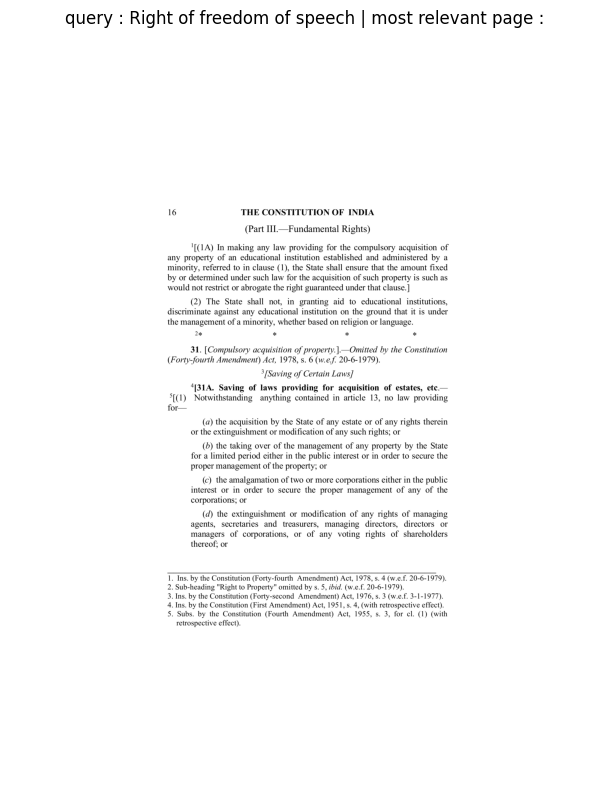

In [26]:
import fitz

doc = fitz.open(pdf_path)
page = doc.load_page(5+41)

#get the image of the pages_and_chunks
img = page.get_pixmap(dpi=300)

#save the image ( optional)
# img.save("output_image_0.jpg")

doc.close()

#convert the pixmap to a numpy array

img_array = np.frombuffer(img.samples_mv , dtype=np.uint8).reshape((img.h,img.w,img.n))

#Display the image using matplotlib

import matplotlib.pyplot as plt

plt.figure(figsize=(13,10))
plt.imshow(img_array)
plt.title(f"query : {query} | most relevant page : ")
plt.axis("off")
plt.show()

In [27]:
def dot_product(vector1 , vector2):
    return torch.dot(vector1,vector2)

def cosine_similarity(v1,v2):
    dot_product = torch.dot(v1,v2)
    
    #get euclidean/L2 norm
    #its a mathemetical formula
    norm_vector1 = torch.sqrt(torch.sum(v1**2))
    norm_vector2 = torch.sqrt(torch.sum(v2**2))
    
    return dot_product/(norm_vector1*norm_vector2)

In [28]:
def retrieve_relevant_resources(query : str , 
                                embeddings : torch.tensor,
                                model : SentenceTransformer = embedding_model , 
                                n_resources_to_return : int =5 , 
                                print_time : bool = True):
    
    # embeds a query with model and returns top k scores and indices from embeddings
    
    #embed the query 
    
    query_embedding = model.encode(query , convert_to_tensor=True)
    
    #get the dot scors on embedding ( bcz our embeddings are already normalized)
    
    start_time = timer()
    dot_scores = util.dot_score(query_embedding , embeddings)[0]
    end_time = timer()
    
    if print_time:
        print(f"[INFO] time taken to get scores on ({len(embeddings)} embeddings : {end_time - start_time :.5f}) seconds. ")
        
    scores , indices = torch.topk(input=dot_scores ,
                                  k=n_resources_to_return
                                  )
    
    return scores,indices


def print_top_result_and_scores(query : str ,
                                embeddings : torch.tensor,
                                pages_and_chunks : list[dict] = pages_and_chunks,
                                n_resources_to_return : int = 5
                                ):
    
    scores , indicies = retrieve_relevant_resources(query=query , 
                                                    embeddings=embeddings,
                                                    n_resources_to_return=n_resources_to_return)
    
    for score , idx in zip(scores  , indicies):
        print(f'score : {score:.4f}')
        print("text : ")
        print(pages_and_chunks[idx]["sentence_chunk"])
        print(f"page number : {pages_and_chunks[idx]["page_number"]}")
        print('\n')

In [29]:
query="Right to freedom of speech"
retrieve_relevant_resources( query=query, embeddings=embeddings)
print_top_result_and_scores(query=query , embeddings=embeddings)

[INFO] time taken to get scores on (1680 embeddings : 0.00013) seconds. 
[INFO] time taken to get scores on (1680 embeddings : 0.00011) seconds. 
score : 0.1701
text : 
Employment can also factor into a woman’s decision to breastfeed or her ability to maintain the practice. Employed mothers have been less likely to initiate breastfeeding and tend to breastfeed for a shorter period of time than new mothers who are not employed or who have lengthy maternity leaves. In 2010 in the United States, the passage of the Affordable Care Act (ACA) required most employers to provide accommodations within the workplace for new mothers to pump breast milk. This law requires a private and clean space within the workplace, other than a restroom, along with adequate break time for a woman to express milk.5It also requires health insurance to cover certain breastfeeding services and supplies such as a breast pump. Additionally, the Hawai‘i State Legislature has passed several bills to support breastfeed

In [30]:
gpu_memory_bytes = torch.cuda.get_device_properties(0).total_memory
gpu_memory_gb = round(gpu_memory_bytes/(2**30))

print(f"available gpu memory : {gpu_memory_gb} GB")

available gpu memory : 4 GB


In [31]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM 
from transformers.utils import is_flash_attn_2_available 
use_quantization_config = True  # Set to True if you want to use quantization

# 1. Create quantization config for smaller model loading (optional)
# Requires %pip install bitsandbytes accelerate, see: https://github.com/TimDettmers/bitsandbytes, https://huggingface.co/docs/accelerate/
# For models that require 4-bit quantization (use this if you have low GPU memory available)
from transformers import BitsAndBytesConfig
quantization_config = BitsAndBytesConfig(load_in_4bit=True,
                                         bnb_4bit_compute_dtype=torch.float16)

# Bonus: Setup Flash Attention 2 for faster inference, default to "sdpa" or "scaled dot product attention" if it's not available
# Flash Attention 2 requires NVIDIA GPU compute capability of 8.0 or above, see: https://developer.nvidia.com/cuda-gpus
# Requires %pip install flash-attn, see: https://github.com/Dao-AILab/flash-attention 
if (is_flash_attn_2_available()) and (torch.cuda.get_device_capability(0)[0] >= 8):
  attn_implementation = "flash_attention_2"
else:
  attn_implementation = "sdpa"
print(f"[INFO] Using attention implementation: {attn_implementation}")

# 2. Pick a model we'd like to use (this will depend on how much GPU memory you have available)
#model_id = "google/gemma-7b-it"
model_id = "google/gemma-2-2b-it"

print(f"[INFO] Using model_id: {model_id}")

# 3. Instantiate tokenizer (tokenizer turns text into numbers ready for the model) 
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_id)

# 4. Instantiate the model
llm_model = AutoModelForCausalLM.from_pretrained(
    pretrained_model_name_or_path=model_id,
    torch_dtype=torch.float16,
    quantization_config=quantization_config,
    device_map="auto",  # Efficient GPU memory usage
    attn_implementation=attn_implementation
)

if not use_quantization_config: # quantization takes care of device setting automatically, so if it's not used, send model to GPU 
    llm_model.to("cuda")

[INFO] Using attention implementation: sdpa
[INFO] Using model_id: google/gemma-2-2b-it


ValueError: Some modules are dispatched on the CPU or the disk. Make sure you have enough GPU RAM to fit the quantized model. If you want to dispatch the model on the CPU or the disk while keeping these modules in 32-bit, you need to set `llm_int8_enable_fp32_cpu_offload=True` and pass a custom `device_map` to `from_pretrained`. Check https://huggingface.co/docs/transformers/main/en/main_classes/quantization#offload-between-cpu-and-gpu for more details. 

In [ ]:
input_text = "what are the macronutrients ?"

print(f"input text : \n {input_text}")

dialog_template = [
    {
        "role" : "user",
        "content":input_text
    }
]

#apply the chat template 

prompt = tokenizer.apply_chat_template(conversation=dialog_template,
                                       tokenize=False,
                                       add_generation_prompt=True)

print(f"prompt (formatted) : \n {prompt}")

In [ ]:
tokenizer

In [ ]:
from transformers import GenerationConfig

# Define a safe generation config
gen_config = GenerationConfig(
    max_new_tokens=350,
    do_sample=True,         # Enables sampling (less deterministic)
    temperature=0.7,        # Controls randomness (lower = more conservative)
    top_k=50,               # Only keep top 50 tokens with highest probability
    top_p=0.9,              # Nucleus sampling (probability mass of top tokens)
    repetition_penalty=1.2  # Reduces repetitive outputs
)

# Generate output
outputs = llm_model.generate(
    input_ids=input_ids['input_ids'],
    attention_mask=input_ids['attention_mask'],
    generation_config=gen_config
)

print(tokenizer.decode(outputs[0], skip_special_tokens=True))

In [ ]:
# Nutrition-style questions generated with GPT4
gpt4_questions = [
    "What are the macronutrients, and what roles do they play in the human body?",
    "How do vitamins and minerals differ in their roles and importance for health?",
    "Describe the process of digestion and absorption of nutrients in the human body.",
    "What role does fibre play in digestion? Name five fibre containing foods.",
    "Explain the concept of energy balance and its importance in weight management."
]

# Manually created question list
manual_questions = [
    "How often should infants be breastfed?",
    "What are symptoms of pellagra?",
    "How does saliva help with digestion?",
    "What is the RDI for protein per day?",
    "water soluble vitamins"
]

query_list = gpt4_questions + manual_questions

In [ ]:
import random

query = random.choice(query_list)

print(f"query : {query}")

# Get just the scores and indices of top related results
scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)
scores, indices

In [ ]:
def prompt_formatter(query: str, 
                     context_items: list[dict]) -> str:
    """
    Augments query with text-based context from context_items.
    """
    # Join context items into one dotted paragraph
    context = "- " + "\n- ".join([item["sentence_chunk"] for item in context_items])

    # Create a base prompt with examples to help the model
    # Note: this is very customizable, I've chosen to use 3 examples of the answer style we'd like.
    # We could also write this in a txt file and import it in if we wanted.
    base_prompt = """
You are an expert assistant trained to provide clear, detailed, and well-structured explanations. Follow these steps to generate the best possible answer:

1. **Extract Relevant Passages:** Identify and extract key information from the provided context that directly relates to the user's query.
2. **Formulate a Detailed Answer:** Using the extracted information, craft an informative and well-structured response that is clear, concise, and explanatory.  
3. **Maintain the Ideal Answer Style:** Follow the example responses below to ensure your answer is detailed, accurate, and engaging.  

### Example 1:
**Query:** What are the fat-soluble vitamins?  
**Answer:** The fat-soluble vitamins include Vitamin A, Vitamin D, Vitamin E, and Vitamin K. These vitamins are absorbed along with dietary fats and stored in the body's fatty tissues and liver. Each plays a distinct role: Vitamin A supports vision and immune function, Vitamin D aids calcium absorption and bone health, Vitamin E protects cells from oxidative stress, and Vitamin K is crucial for blood clotting and bone strength.

### Example 2:
**Query:** What are the causes of type 2 diabetes?  
**Answer:** Type 2 diabetes is linked to lifestyle factors such as excessive caloric intake, poor diet, and lack of physical activity. Diets rich in refined sugars and unhealthy fats contribute to insulin resistance, where cells no longer respond effectively to insulin. Over time, this impairs the pancreas’s ability to regulate blood sugar, leading to type 2 diabetes. Maintaining a balanced diet and staying active can significantly reduce this risk.

### Example 3:
**Query:** What is the importance of hydration for physical performance?  
**Answer:** Hydration is vital for physical performance as water maintains blood volume, regulates body temperature, and facilitates nutrient and oxygen delivery. Proper hydration supports muscle function, endurance, and recovery. Without adequate water intake, dehydration can cause fatigue, cramps, and reduced performance. To optimize physical performance, it's important to drink water before, during, and after exercise.

---

Now follow these instructions to generate the answer:

**Context Items:**  
{context}  

**Relevant Passages (Extracted):** <extract relevant passages from the context here>  

**User Query:** {query}  
**Answer:** 
"""

    # Update base prompt with context items and query   
    base_prompt = base_prompt.format(context=context, query=query)

    # Create prompt template for instruction-tuned model
    dialogue_template = [
        {"role": "user",
        "content": base_prompt}
    ]

    # Apply the chat template
    prompt = tokenizer.apply_chat_template(conversation=dialogue_template,
                                          tokenize=False,
                                          add_generation_prompt=True)
    return prompt

In [ ]:
#outside the function
query = random.choice(query_list)
print(f"Query: {query}")

# Get relevant resources
scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)
    
# Create a list of context items
context_items = [pages_and_chunks[i] for i in indices]

# Format prompt with context items
prompt = prompt_formatter(query=query,
                          context_items=context_items)
print(prompt)

In [ ]:

input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

# Define a safe generation config
gen_config = GenerationConfig(
    max_new_tokens=350,
    do_sample=True,         # Enables sampling (less deterministic)
    temperature=0.7,        # Controls randomness (lower = more conservative)
    top_k=50,               # Only keep top 50 tokens with highest probability
    top_p=0.9,              # Nucleus sampling (probability mass of top tokens)
    repetition_penalty=1.2  # Reduces repetitive outputs
)

# Generate output
outputs = llm_model.generate(
    input_ids=input_ids['input_ids'],
    temperature = 0.7 , #the most imoportant feature , ranges between 0 and 1 , 
    #the lower the value the more determinstic the text, the higher the value the more creative the text.
    # it has to be experimented to find the best value we can use
    attention_mask=input_ids['attention_mask'],
    generation_config=gen_config
)
# Turn the output tokens into text
output_text = tokenizer.decode(outputs[0])

print(f"Query: {query}")
print(f"RAG answer:\n{output_text.replace(prompt, '')}")

In [ ]:
def ask(query, 
        temperature=0.7,
        max_new_tokens=512,
        format_answer_text=True, 
        return_answer_only=True):
    """
    Takes a query, finds relevant resources/context and generates an answer to the query based on the relevant resources.
    """
    #RETRIEVAL
    # Get just the scores and indices of top related results
    scores, indices = retrieve_relevant_resources(query=query,
                                                  embeddings=embeddings)
    
    # Create a list of context items
    context_items = [pages_and_chunks[i] for i in indices]

    # Add score to context item
    for i, item in enumerate(context_items):
        item["score"] = scores[i].cpu() # return score back to CPU 
       
        
    #AUGMENTATION
    # Format the prompt with context items
    prompt = prompt_formatter(query=query,
                              context_items=context_items)
    
    
    #GENERATION
    # Tokenize the prompt
    input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

    # Generate an output of tokens
    gen_config = GenerationConfig(
    max_new_tokens=350,
    do_sample=True,         # Enables sampling (less deterministic)
    temperature=0.7,        # Controls randomness (lower = more conservative)
    top_k=50,               # Only keep top 50 tokens with highest probability
    top_p=0.9,              # Nucleus sampling (probability mass of top tokens)
    repetition_penalty=1.2  # Reduces repetitive outputs
)



# Generate output
    outputs = llm_model.generate(
    input_ids=input_ids['input_ids'],
    temperature=temperature,
    attention_mask=input_ids['attention_mask'],
    do_sample=True,
    max_new_tokens=max_new_tokens,
    generation_config=gen_config
)
    # outputs = llm_model.generate(**input_ids,
    #                              temperature=temperature,
    #                              do_sample=True,
    #                              max_new_tokens=max_new_tokens)
    
    # Turn the output tokens into text
    output_text = tokenizer.decode(outputs[0])

    if format_answer_text:
        # Replace special tokens and unnecessary help message
        output_text = output_text.replace(prompt, "").replace("<bos>", "").replace("<eos>", "").replace("<end_of_turn>" ,"").replace("Sure, here is the answer to the user query:\n\n", "")

    # Only return the answer without the context items
    if return_answer_only:
        return output_text
    
    return output_text, context_items

In [ ]:
query = random.choice(query_list)
print(f"Query: {query}")

# Answer query with context and return context 
answer, context_items = ask(query=query, 
                            temperature=0.7,
                            max_new_tokens=512,
                            return_answer_only=False)

print(f"Answer:\n")
print(answer)
print(f"Context items:")
context_items

In [ ]:
# Recommended structure — Save both in one directory
# llm_model.save_pretrained("./RAG1_human_nutrition_pdf")
# tokenizer.save_pretrained("./RAG1_human_nutrition_pdf")


In [ ]:
# prompt = random.choice(query_list)
# print(f"Query: {query}")

# # Answer query with context and return context 
# answer, context_items = ask(query=prompt, 
#                             temperature=0.7,
#                             max_new_tokens=512,
#                             return_answer_only=False)

# print(f"Answer:\n")
# print(answer)